#### Exploratory Data Analysis

In [5]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [6]:
# reading aisles dataset
aisles = pd.read_csv('data/aisles.csv')

In [7]:
# reading department dataset
department = pd.read_csv('data/departments.csv')

In [8]:
all_orders_train = pd.read_csv('data/all_orders_train.csv')

In [9]:
all_orders_prior = pd.read_csv('data/all_orders_prior.csv')

In [10]:
all_orders = pd.read_csv('data/all_orders.csv')

In [11]:
all_orders_train.isnull().sum()

product_id                0
product_name              0
aisle_id                  0
department_id             0
order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [12]:
all_orders_prior.isnull().sum()

product_id                0
product_name              0
aisle_id                  0
department_id             0
order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [13]:
# average days since prior orders in the all_orders_train 
np.mean(all_orders_train['days_since_prior_order']) # average of 17 days since prior order

17.056305371480914

In [14]:
# average days since prior orders in the all_orders_prior
np.mean(all_orders_prior['days_since_prior_order']) # average of 11 days since prior order

11.05868732979885

In [15]:
all_orders_train.shape

(69869, 13)

In [16]:
len(all_orders_train['user_id'].unique())

6632

In [17]:
len(all_orders_train['order_number'].unique())

96

In [18]:
len(all_orders_train['order_id'].unique())

6632

**Days of Week**

In [19]:
order_dow = all_orders['order_dow'].value_counts().sort_values(ascending = False)

In [20]:
order_dow = order_dow.rename({0:'Sunday', 1: 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'})

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


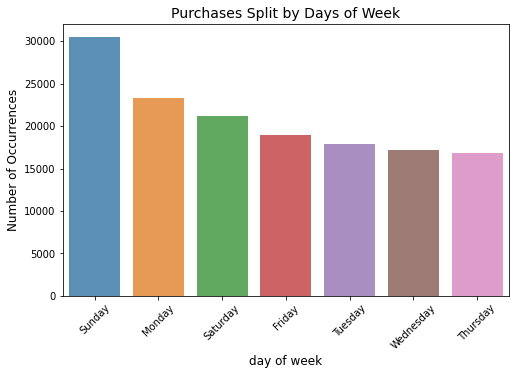

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(order_dow.index, order_dow.values, alpha=0.8)
plt.title('Purchases Split by Days of Week', fontsize = 14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('day of week', fontsize=12)
plt.xticks(rotation=45)
plt.show();

The busiest day was Sunday, followed by Monday. The least number of transactions were made on Thursday.

**Hour of Day**

In [26]:
order_hour = all_orders['order_hour_of_day'].value_counts(normalize = True)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


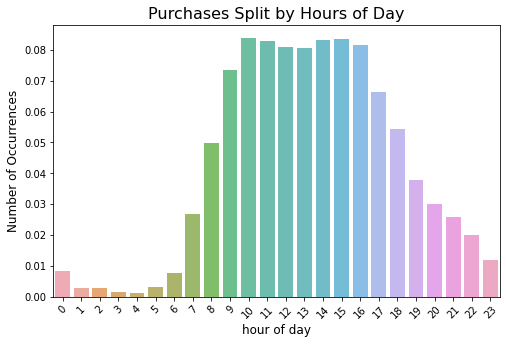

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(order_hour.index, order_hour.values, alpha=0.8)
plt.title('Purchases Split by Hours of Day', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour of day', fontsize=12)
plt.xticks(rotation=45)
plt.show();

Majority of transactions occurred between 11am and 3pm. 

**Hour of day on the busiest day**

In [32]:
filter_dow = all_orders['order_dow'] == 0
sunday_orders = all_orders[filter_dow]
sunday_orders_hour = sunday_orders['order_hour_of_day'].value_counts(normalize = True)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


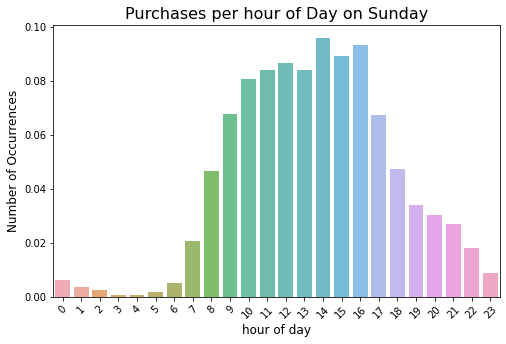

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(sunday_orders_hour.index, sunday_orders_hour.values, alpha=0.8)
plt.title('Purchases per hour of Day on Sunday', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour of day', fontsize=12)
plt.xticks(rotation=45)
plt.show();

Looking at Sunday exclusively (the busiest day), transactions are peaked at 11am , 1pm, 3pm. 

**Aisles split by day of week**

In [38]:
sunday_orders_product = sunday_orders['aisle'].value_counts()[:10].sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


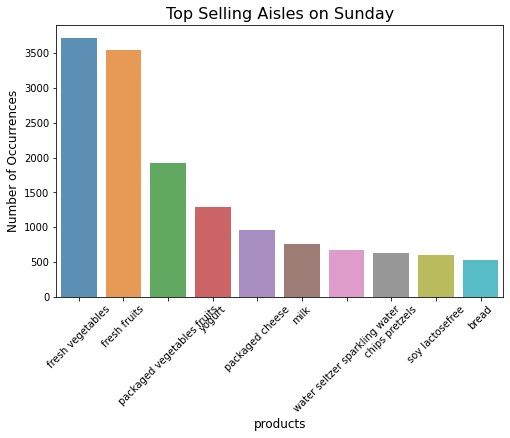

In [80]:
plt.figure(figsize=(8, 5))
sns.barplot(sunday_orders_product.index, sunday_orders_product.values, alpha=0.8)
plt.title('Top Selling Aisles on Sunday', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [40]:
filter_thur = all_orders['order_dow'] == 4
thur_orders = all_orders[filter_thur]
thur_aisles = thur_orders['aisle'].value_counts()[:10].sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


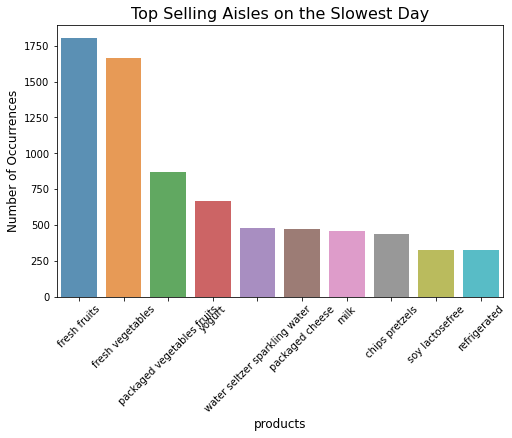

In [81]:
plt.figure(figsize=(8, 5))
sns.barplot(thur_aisles.index, thur_aisles.values, alpha=0.8)
plt.title('Top Selling Aisles on the Slowest Day', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show();

**Aisles by hour of day**

In [42]:
morning_orders = pd.read_csv('data/morning_orders.csv')

In [43]:
morning_aisles = morning_orders['aisle'].value_counts()[:10].sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


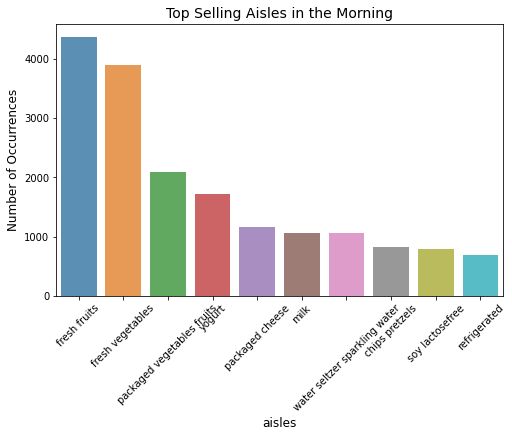

In [82]:
plt.figure(figsize=(8, 5))
sns.barplot(morning_aisles.index, morning_aisles.values, alpha=0.8)
plt.title('Top Selling Aisles in the Morning', fontsize = 14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('aisles', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [45]:
day_orders = pd.read_csv('data/day_orders.csv')

In [46]:
day_aisles = day_orders['aisle'].value_counts()[:10].sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


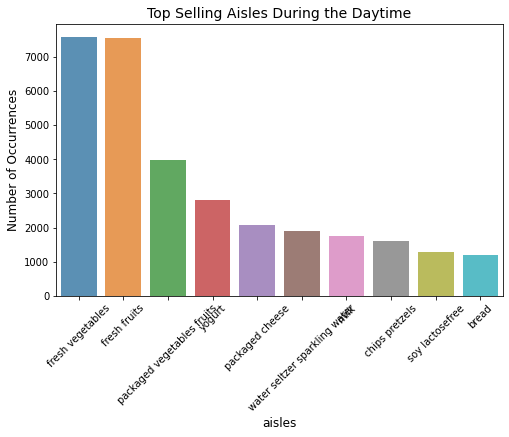

In [83]:
plt.figure(figsize=(8, 5))
sns.barplot(day_aisles.index, day_aisles.values, alpha=0.8)
plt.title('Top Selling Aisles During the Daytime', fontsize = 14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('aisles', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [48]:
evening_orders = pd.read_csv('data/evening_orders.csv')

In [49]:
evening_aisles = evening_orders['aisle'].value_counts()[:10].sort_values(ascending = False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


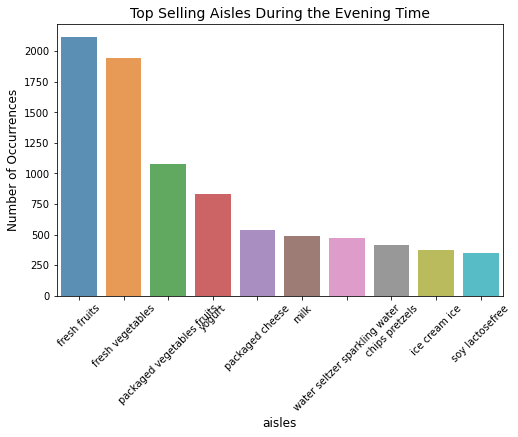

In [84]:
plt.figure(figsize=(8, 5))
sns.barplot(evening_aisles.index, evening_aisles.values, alpha=0.8)
plt.title('Top Selling Aisles During the Evening Time', fontsize = 14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('aisles', fontsize=12)
plt.xticks(rotation=45)
plt.show();

**Top Products**

In [51]:
top_30 = all_orders['product_name'].value_counts()[:20].sort_values(ascending=False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


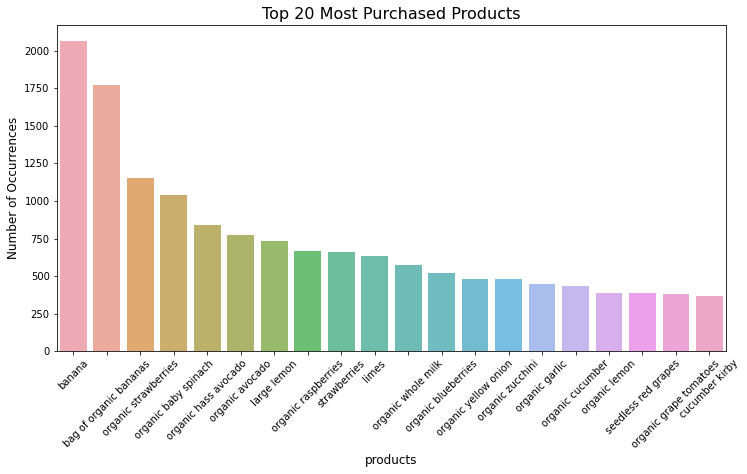

In [86]:
plt.figure(figsize=(12,6))
sns.barplot(top_30.index, top_30.values, alpha=0.8)
plt.title('Top 20 Most Purchased Products', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Top 5 purchased products are: banana, bag of organic bananas, organic strawberries, organic baby spinach, organic hass avocado.

**Reordered Products**

In [57]:
filter_reordered = all_orders['reordered'] == 1
reordered_prod = all_orders[filter_reordered]
reordered_prod = reordered_prod['product_name'].value_counts()[:20].sort_values(ascending=False)

c:\users\anel akiyanova\anaconda3\envs\february\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


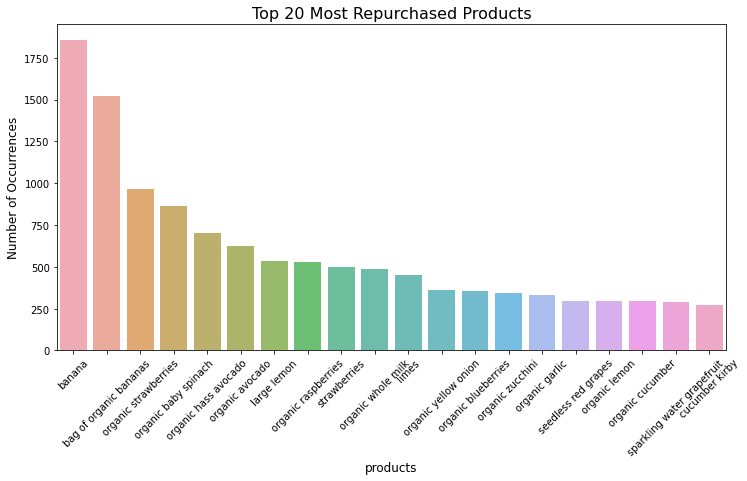

In [176]:
plt.figure(figsize=(12,6))
sns.barplot(reordered_prod.index, reordered_prod.values, alpha=0.8)
plt.title('Top 20 Most Repurchased Products', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('products', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Highest reordered products are similar: banana, bag of organic bananas, organic strawberries, organic baby spinach, organic hass avocado. 

**Days Since Prior Purchase**

In [63]:
repurchased_days = all_orders['days_since_prior_order'].astype('int64').value_counts().sort_values()

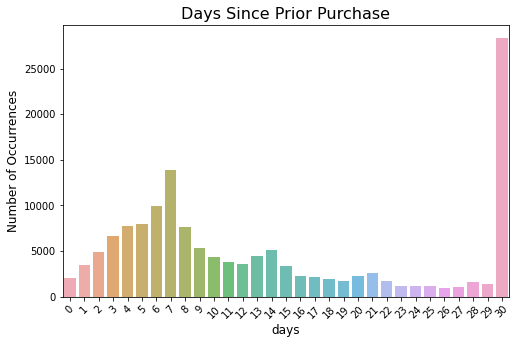

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(x = repurchased_days.index, y = repurchased_days.values, alpha=0.8)
plt.title('Days Since Prior Purchase', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('days', fontsize=12)
plt.xticks(rotation=45)
plt.show();

Purchases appear to be cyclical - most repurchases happen within 7 and 30 days since the last transaction. 

**Total products per order id**

In [70]:
# group by order_id to see highest number of products per order less than 21
num_prod_per_order = all_orders.groupby('order_id')['quantity'].sum().sort_values(ascending = False)
num_prod_per_order = num_prod_per_order[num_prod_per_order < 21]

In [71]:
# value count and normalize values
num_prod = pd.DataFrame(num_prod_per_order)
num_normalized = pd.DataFrame(num_prod.value_counts(normalize=True))
# reset index
num_normalized.reset_index(level=0, inplace=True)
# rename columns to make more sense
num_normalized.rename(columns = {0:'order_count', 'quantity':'number_of_prod'}, inplace = True)

In [72]:
# turn number of prod column into integer
num_normalized['number_of_prod'] = num_normalized['number_of_prod'].astype('int64')

In [73]:
# # turn order_count column into %
# formatted_num = num_normalized.style.format({'order_count': '{:,.2%}'.format})

In [74]:
# type(formatted_num)

pandas.io.formats.style.Styler

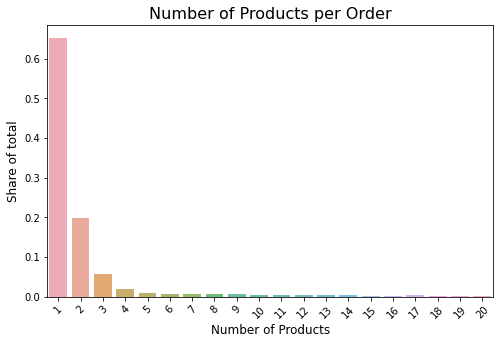

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x = num_normalized['number_of_prod'], y = num_normalized['order_count'], alpha=0.8)
plt.title('Number of Products per Order', fontsize = 16)
plt.ylabel('Share of total', fontsize=12)
plt.xlabel('Number of Products', fontsize=12)
plt.xticks(rotation=45)
plt.show();

**Products sorted by added to cart filter**

In [141]:
# group by order in which products were added to cart 
prod_added_cart = all_orders.groupby('add_to_cart_order')['aisle'].agg([('aisle', ','.join)]).reset_index()
# value count and normalize values
cart_prod = pd.DataFrame(prod_added_cart)
cart_prod
# reset index
cart_prod.reset_index(level=0, inplace=True)

In [157]:
prod_cart_filter = cart_prod['add_to_cart_order'] > 70
prod_cart_order = cart_prod[prod_cart_filter]

In [158]:
prod_cart_order = prod_cart_order.sort_values(by = 'add_to_cart_order', ascending = False)

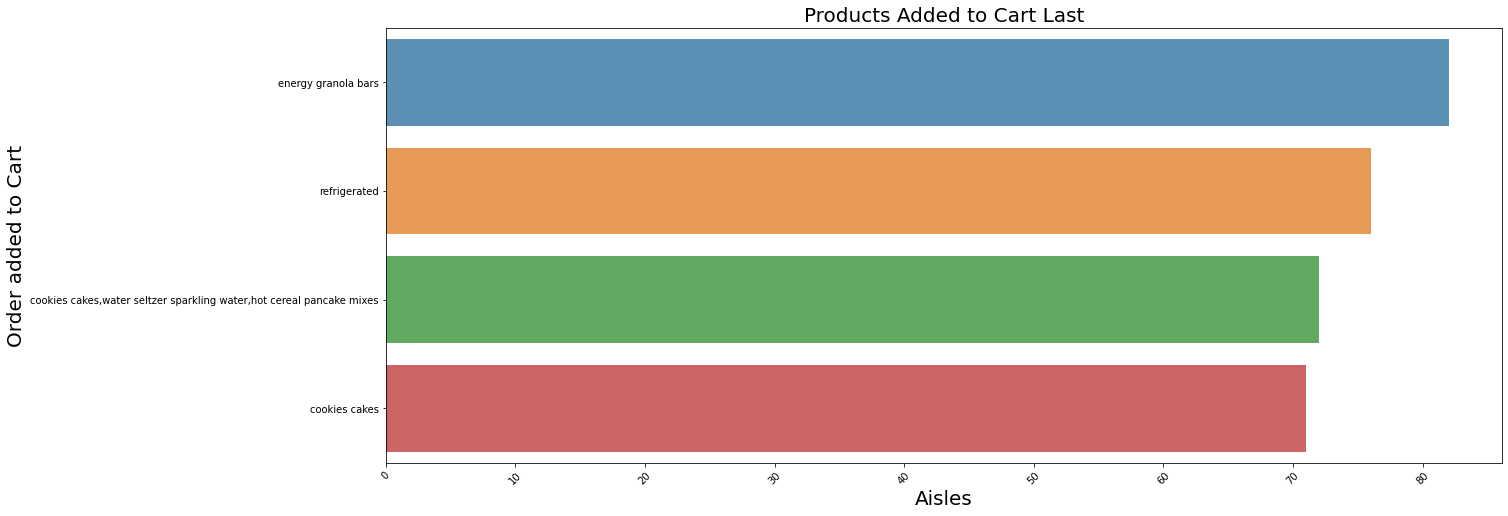

In [160]:
plt.figure(figsize=(20, 8))
sns.barplot(x = prod_cart_order['add_to_cart_order'], y = prod_cart_order['aisle'], alpha=0.8)
plt.title('Products Added to Cart Last', fontsize = 20)
plt.ylabel('Order added to Cart', fontsize=20)
plt.xlabel('Aisles', fontsize=20)
plt.xticks(rotation=45)
plt.show();

Energy granola bars, refrigerated goods, cookies, sparkling water, was added last to cart. 